<a href="https://colab.research.google.com/github/nagendrap418/ML/blob/main/corona(Text_mining).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
!pip install wordcloud matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [31]:
import numpy as np 
import pandas as pd 
import string # special operations on strings
import spacy # language models
import seaborn as sns
import re 
import string
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk import word_tokenize
from nltk.corpus import stopwords
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
from PIL import Image

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
train=pd.read_csv('/content/Corona_NLP_train.csv',encoding='latin')
train

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral


In [5]:
test=pd.read_csv('/content/Corona_NLP_test.csv',encoding='latin')
test

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral
...,...,...,...,...,...,...
3793,3794,48746,Israel ??,16-03-2020,Meanwhile In A Supermarket in Israel -- People...,Positive
3794,3795,48747,"Farmington, NM",16-03-2020,Did you panic buy a lot of non-perishable item...,Negative
3795,3796,48748,"Haverford, PA",16-03-2020,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral
3796,3797,48749,NaN,16-03-2020,Gov need to do somethings instead of biar je r...,Extremely Negative


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       3798 non-null   int64 
 1   ScreenName     3798 non-null   int64 
 2   Location       2964 non-null   object
 3   TweetAt        3798 non-null   object
 4   OriginalTweet  3798 non-null   object
 5   Sentiment      3798 non-null   object
dtypes: int64(2), object(4)
memory usage: 178.2+ KB


In [10]:
train.drop(['UserName', 'ScreenName'], axis=1, inplace=True)
test.drop(['UserName', 'ScreenName'], axis=1, inplace=True)

In [11]:
print(train.isnull().sum())

Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64


In [12]:
print(test.isnull().sum())

Location         834
TweetAt            0
OriginalTweet      0
Sentiment          0
dtype: int64


In [13]:
print(train.Location.value_counts(normalize= True, dropna= False)[:30] *100)

NaN                        20.871298
London                      1.312049
United States               1.282892
London, England             1.263455
New York, NY                0.959740
Washington, DC              0.906286
United Kingdom              0.818816
Los Angeles, CA             0.682751
India                       0.651165
UK                          0.563695
Australia                   0.546687
USA                         0.541828
Canada                      0.464077
England, United Kingdom     0.464077
Toronto, Ontario            0.388755
Global                      0.386326
Chicago, IL                 0.376607
California, USA             0.371747
San Francisco, CA           0.369317
Boston, MA                  0.364458
New York, USA               0.340161
New Delhi, India            0.335301
Atlanta, GA                 0.306145
New York                    0.306145
Mumbai, India               0.264840
Worldwide                   0.245402
Lagos, Nigeria              0.240542
H

In [14]:
print(test.Location.value_counts(normalize= True, dropna= False)[:30] *100)

NaN                        21.958926
United States               1.974724
London, England             1.263823
Washington, DC              1.000527
New York, NY                0.895208
Los Angeles, CA             0.868878
Toronto, Ontario            0.763560
Canada                      0.763560
California, USA             0.684571
London                      0.658241
Toronto                     0.552923
USA                         0.526593
Atlanta, GA                 0.500263
San Francisco, CA           0.500263
United Kingdom              0.473934
Texas, USA                  0.447604
Ireland                     0.447604
New York, USA               0.421274
Los Angeles                 0.421274
Chicago, IL                 0.394945
India                       0.394945
UK                          0.368615
Ontario, Canada             0.342285
MontrÃ©al, QuÃ©bec          0.315956
New York City               0.315956
Austin, TX                  0.289626
Australia                   0.289626
W

In [15]:
train.Location = train.Location.str.split(',').str[0]
test.Location = test.Location.str.split(',').str[0]
# replace "extremely positive/negative" with "postive/negative"
train["Sentiment"] = train["Sentiment"].str.replace("Extremely Negative", "Negative")
train["Sentiment"] = train["Sentiment"].str.replace("Extremely Positive", "Positive")

test['Sentiment'] = test.Sentiment.str.replace('Extremely Positive', 'Positive')
test['Sentiment'] = test.Sentiment.str.replace('Extremely Negative', 'Negative')

In [16]:
print(train.Sentiment.value_counts(),'\n')
print(train.Sentiment.value_counts(normalize=True) * 100)

Positive    18046
Negative    15398
Neutral      7713
Name: Sentiment, dtype: int64 

Positive    43.846733
Negative    37.412834
Neutral     18.740433
Name: Sentiment, dtype: float64


In [17]:
print(test.Sentiment.value_counts(),'\n')
print(test.Sentiment.value_counts(normalize=True) * 100)

Negative    1633
Positive    1546
Neutral      619
Name: Sentiment, dtype: int64 

Negative    42.996314
Positive    40.705635
Neutral     16.298052
Name: Sentiment, dtype: float64


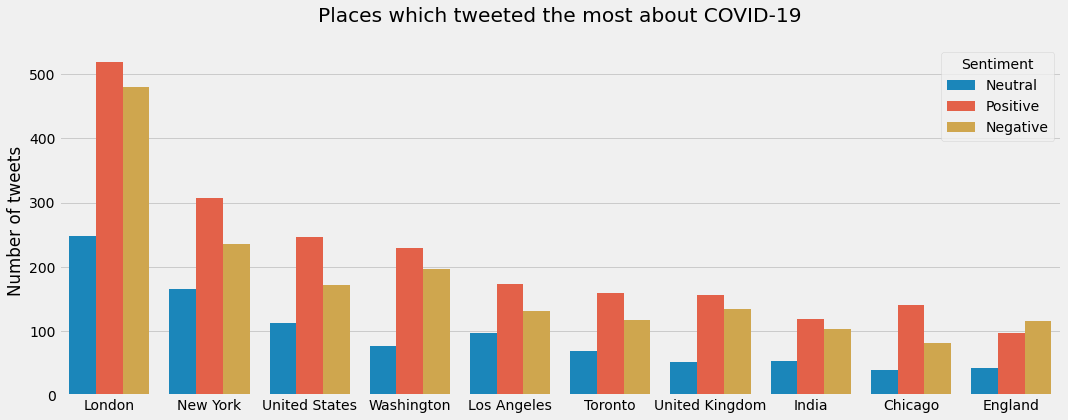

In [18]:
plt.style.use("fivethirtyeight")

plt.figure(figsize=(16, 6))
location = sns.countplot(x= 'Location', data= train, hue="Sentiment", order=train.Location.value_counts()[:10].index)
location.set_title("Places which tweeted the most about COVID-19", y=1.05)

def axis_labels(ax):
    ax.set_ylabel("Number of tweets")
    ax.set_xlabel("")

axis_labels(location)

plt.show()

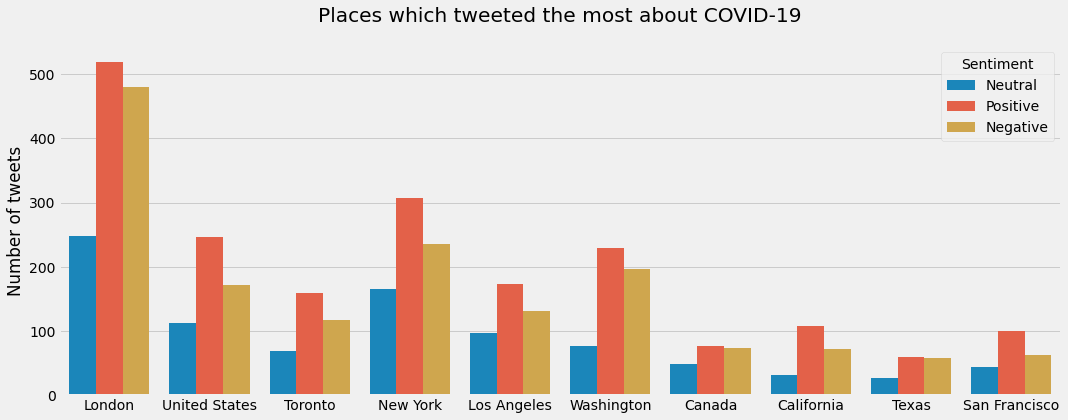

In [19]:
plt.style.use("fivethirtyeight")

plt.figure(figsize=(16, 6))
location = sns.countplot(x= 'Location', data= train, hue="Sentiment", order=test.Location.value_counts()[:10].index)
location.set_title("Places which tweeted the most about COVID-19", y=1.05)

def axis_labels(ax):
    ax.set_ylabel("Number of tweets")
    ax.set_xlabel("")

axis_labels(location)

plt.show()

In [21]:
def tweets(df, n, col_name="OriginalTweet"):
    for tweet_no, tweet in enumerate(df[col_name][:n]):
        print(tweet_no+1, tweet, '\n')
        print("*" * 60, '\n')
        
tweets(train, 10)

1 @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8 

************************************************************ 

2 advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order 

************************************************************ 

3 Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P 

************************************************************ 






#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral https://t.co/zrlG0Z520j 

************************************************************ 





#CoronavirusFrance #restezchezvous #StayAtHome #confinement https://t.co/usmuaLq72n 

************************************

In [23]:
# combine train and test dataframes
combined = pd.concat([train, test], ignore_index= True)

# select relevant features: tweet and Sentiments
combined = combined.loc[:, ["OriginalTweet", "Sentiment"]]

# load stop words
stop_word = stopwords.words('english')

def clean_tweet(text):
    text = re.sub(r"#\w+", " ", text)            # remove hashtags
    text = re.sub(r"@\w+", " ",text)             # remove mentions
    text = re.sub(r"http\S+", " ", text)         # remove urls
    text = re.sub(r"[^a-zA-Z]", " ", text)        # remove non-words (digits, punctuations etc)
    text = text.lower().strip()                  # convert tweet to lowercase and strip
    
    text = " ".join([word for word in text.split() if not word in stop_word])           # remove stop words    
    
    text = " ".join(nltk.word_tokenize(text))           # tokenize text
      
    return text

# clean OriginalTweet and assign the data to an new "tweet" column
combined['tweet'] = combined['OriginalTweet'].apply(lambda x: clean_tweet(x))

In [24]:
combined

,OriginalTweet,Sentiment,tweet
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,
1,advice Talk to your neighbours family to excha...,Positive,advice talk neighbours family exchange phone n...
2,Coronavirus Australia: Woolworths to give elde...,Positive,coronavirus australia woolworths give elderly ...
3,My food stock is not the only one which is emp...,Positive,food stock one empty please panic enough food ...
4,"Me, ready to go at supermarket during the #COV...",Negative,ready go supermarket outbreak paranoid food st...
...,...,...,...
44950,Meanwhile In A Supermarket in Israel -- People...,Positive,meanwhile supermarket israel people dance sing...
44951,Did you panic buy a lot of non-perishable item...,Negative,panic buy lot non perishable items echo needs ...
44952,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral,asst prof economics talking recent research co...
44953,Gov need to do somethings instead of biar je r...,Negative,gov need somethings instead biar je rakyat ass...


In [28]:
tweets(combined, 8, "tweet")

1  

************************************************************ 

2 advice talk neighbours family exchange phone numbers create contact list phone numbers neighbours schools employer chemist gp set online shopping accounts poss adequate supplies regular meds order 

************************************************************ 

3 coronavirus australia woolworths give elderly disabled dedicated shopping hours amid covid outbreak 

************************************************************ 

4 food stock one empty please panic enough food everyone take need stay calm stay safe 

************************************************************ 

5 ready go supermarket outbreak paranoid food stock litteraly empty serious thing please panic causes shortage 

************************************************************ 

6 news region first confirmed covid case came sullivan county last week people flocked area stores purchase cleaning supplies hand sanitizer food toilet paper goods reports 

In [34]:
!python wc_generator.py

python3: can't open file 'wc_generator.py': [Errno 2] No such file or directory


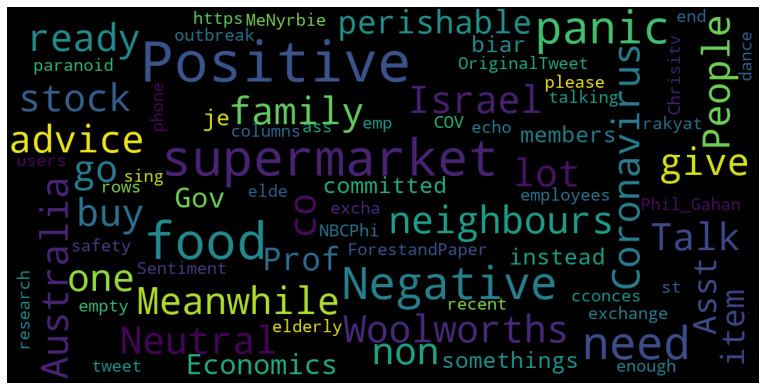

In [50]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
from nltk import corpus
import nltk.corpus as corpus
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)
   
    wordcloud=wordcloud.generate(str(combined))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(corpus)